O primeiro metodo é o metodo por exaustão (ou metodo por força bruta)
    consiste em percorrer cada possibilidade e encontrar a que tem a menor distancia
    não é eficiente para larga escala de dados

In [47]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean as dist_euclidiana
from itertools import permutations

In [48]:
origem = (0,0)
destino = (4,4)
enderecos = [(2,1),(2,2),(8,3),(5,3)]

rota = [origem] + enderecos + [destino]
rota

[(0, 0), (2, 1), (2, 2), (8, 3), (5, 3), (4, 4)]

In [49]:
def desenhar_rota(rota):
    
    tamanho_rota = len(rota)
    distancia_percorrida = 0

    for i in range(tamanho_rota):
        x,y = rota[i]
        cor = 'black'
        if i==0:
            cor='blue'
        elif i==tamanho_rota-1:
            cor='red'
        plt.scatter(x,y, color=cor)
        
        if i<tamanho_rota-1:
            x1,y1 = rota[i+1]
            dx=x1-x
            dy=y1-y
            plt.arrow(x, y, dx, dy, color='black', head_width=0.1)
            distancia_percorrida = distancia_percorrida+dist_euclidiana(rota[i], rota[i+1])

    plt.title(f'Rota com distancia de {round(distancia_percorrida, 2)}')
    plt.show


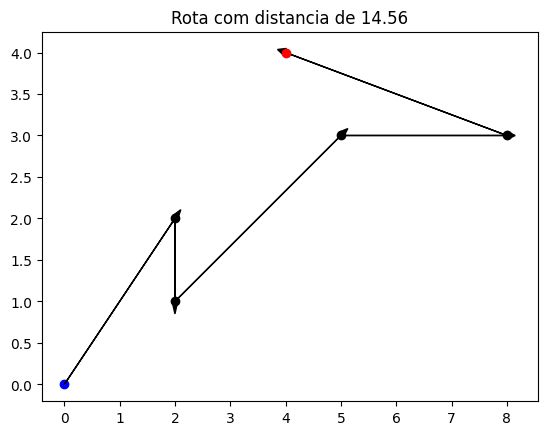

In [50]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2),(2,1),(5,3),(8,3)]
rota = [origem] + enderecos + [destino]

desenhar_rota(rota)

In [51]:
def calcular_distancia_rota(rota):
    distancia = 0
    tamanho_rota = len(rota)
    for i in range(tamanho_rota):
        if i < tamanho_rota-1:
            distancia = distancia + dist_euclidiana(rota[i], rota[i+1])
    return distancia

[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)] 13.52145126328583


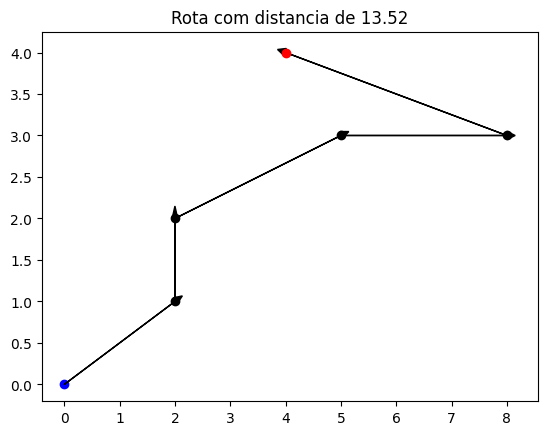

In [52]:
menor_distancia = float('inf')
menor_rota = None
for permutacao in permutations(enderecos):
    rota = [origem] + list(permutacao) + [destino]
    distancia_rota = calcular_distancia_rota(rota)
    
    if distancia_rota<menor_distancia:
        menor_distancia = distancia_rota
        menor_rota = rota

print(menor_rota, menor_distancia)
desenhar_rota(menor_rota)

In [53]:

def forca_bruta(origem, destino, enderecos):
    menor_distancia = float('inf')
    menor_rota = None
    for permutacao in permutations(enderecos):
        rota = [origem] + list(permutacao) + [destino]
        distancia_rota = calcular_distancia_rota(rota)
        
        if distancia_rota<menor_distancia:
            menor_distancia = distancia_rota
            menor_rota = rota

    return menor_rota, menor_distancia

In [54]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2),(2,1),(5,3),(8,3),(10,5),(9,4),(8,7),(6,3),(9,6),(7,5)]

#menor_rota, menor_distancia = forca_bruta(origem, destino, enderecos)
#desenhar_rota(menor_rota)
#comentada pois demora 5minutos para encontrar

O proximo metado é o metodo heuristico. 
    no caso encontramos a mesma distancia com um tempo de processamento quase instantaneo, enquanto o outro demorou 5 minutos
    porém não são em todos os casos que serão encontrados os melhores resultados. o metodo pode encontrar resultado fora do ideal

In [55]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2),(2,1),(5,3),(8,3)]

In [56]:
def vizinho_mais_proximo(origem, destino, enderecos):
    ponto_atual = origem
    enderecos_restantes = enderecos.copy()

    distancia_percorrida = 0
    menor_rota = [ponto_atual]

    while enderecos_restantes:
        #encontrar o ponto mais proximo do ponto atual
        menor_distancia = float('inf')
        ponto_mais_proximo = None
        for endereco in enderecos_restantes:
            distancia = dist_euclidiana(ponto_atual, endereco)
            if distancia < menor_distancia:
                menor_distancia = distancia
                ponto_mais_proximo = endereco
                
        #remover esse ponto da linha de enderecos
        enderecos_restantes.remove(ponto_mais_proximo)
        #adicionar esse ponto na menor_rota
        menor_rota.append(ponto_mais_proximo)
        #atualizar a distancia_percorrida
        distancia_percorrida = distancia_percorrida + menor_distancia
        #atualizar ponto atual
        ponto_atual = ponto_mais_proximo
        
    menor_rota.append(destino)
    distancia_percorrida = distancia_percorrida + dist_euclidiana(ponto_atual, destino)
    
    return menor_rota, round(float(distancia_percorrida), 2)

In [57]:
vizinho_mais_proximo(origem, destino, enderecos)


([(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)], 13.52)

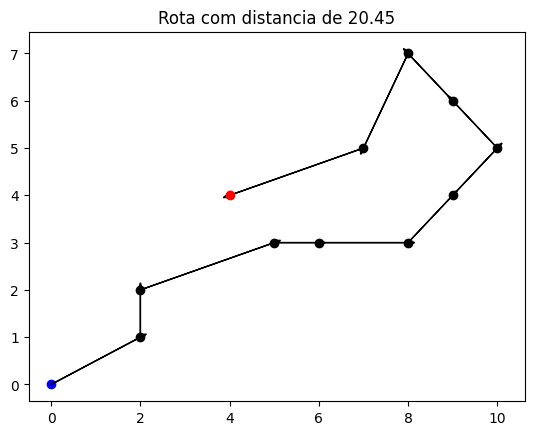

In [58]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2),(2,1),(5,3),(8,3),(10,5),(9,4),(8,7),(6,3),(9,6),(7,5)]

menor_rota, menor_distancia = vizinho_mais_proximo(origem, destino, enderecos)
desenhar_rota(menor_rota)

Comparando os dois metodos abaixo

In [64]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2),(2,1),(5,3),(9,4),(8,7),(6,3),(9,6),(7,5)]

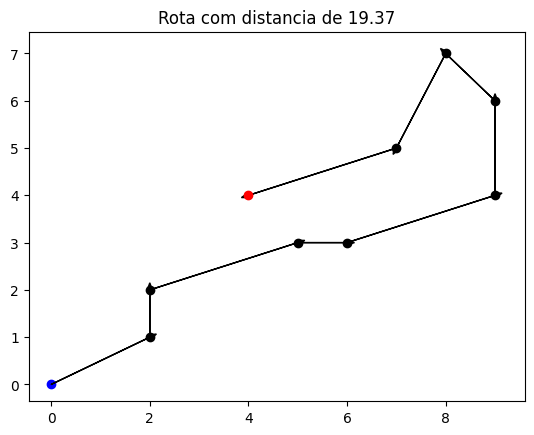

In [65]:
menor_rota, menor_distancia = forca_bruta(origem, destino, enderecos)
desenhar_rota(menor_rota)

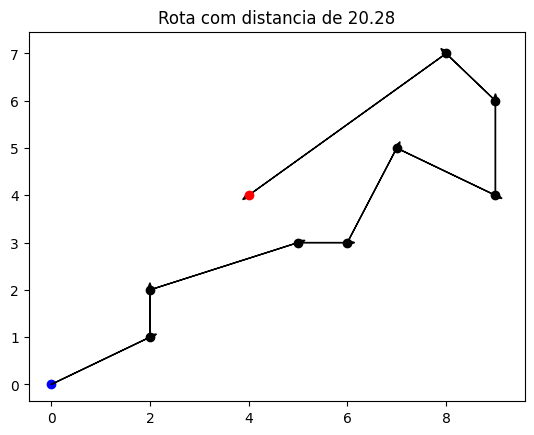

In [66]:
menor_rota, menor_distancia = vizinho_mais_proximo(origem, destino, enderecos)
desenhar_rota(menor_rota)

Nenhum subconjunto encontrado


In [68]:
def subset_sum_heuristic(numbers, target):
    # Ordena os números em ordem decrescente
    numbers.sort(reverse=True)
    current_sum = 0
    subset = []

    for num in numbers:
        if current_sum + num <= target:
            subset.append(num)
            current_sum += num
        
        if current_sum == target:
            return True, subset
    
    return False, None

# Testando o heurístico
numbers = [3, 34, 4, 12, 5, 2, 3]
target = 9
result, subset = subset_sum_heuristic(numbers, target)
print(f"Heurística - Subconjunto encontrado: {subset}" if result else "Nenhum subconjunto encontrado")


Heurística - Subconjunto encontrado: [5, 4]
